In [15]:
!pip install matplotlib pandas scikit-learn seaborn graphviz

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import Image, display
from graphviz import Source

In [17]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Drop rows with missing values
df.dropna()
display(df)

# Convert categorical variables to category type
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
df["target_label"] = df["target"].map({0: "Malignant", 1: "Benign"})

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [18]:
# Feature and label separation
feature = df.drop(["target", "target_label"], axis=1)
label = df["target"]

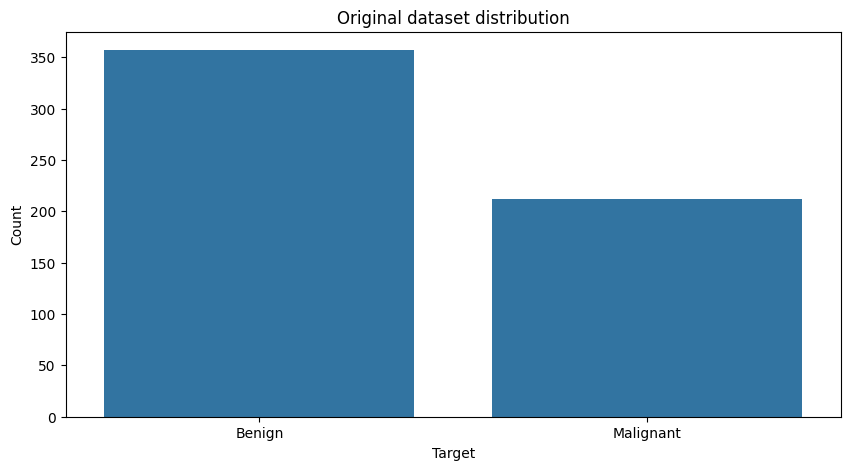

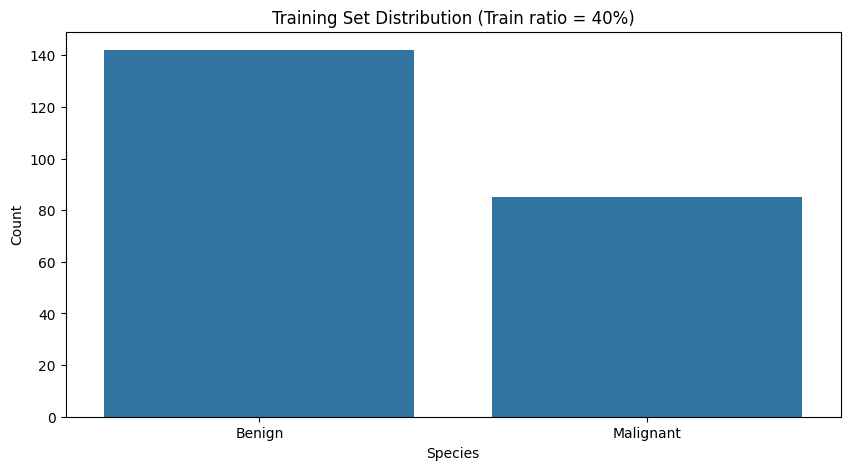

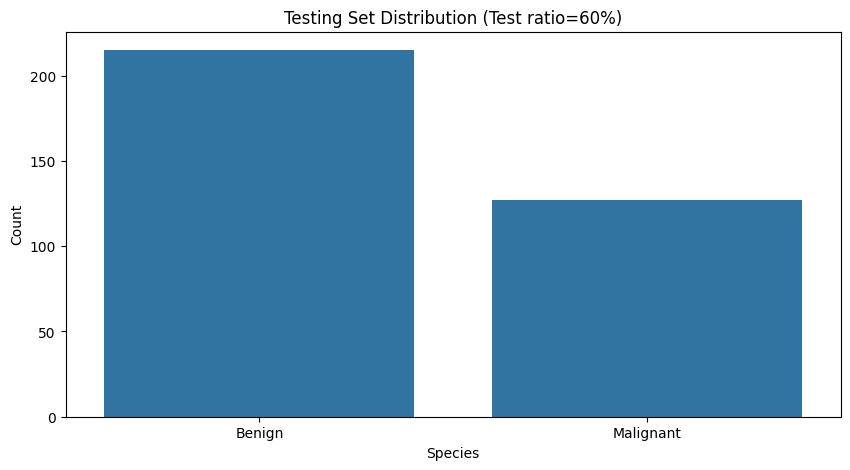

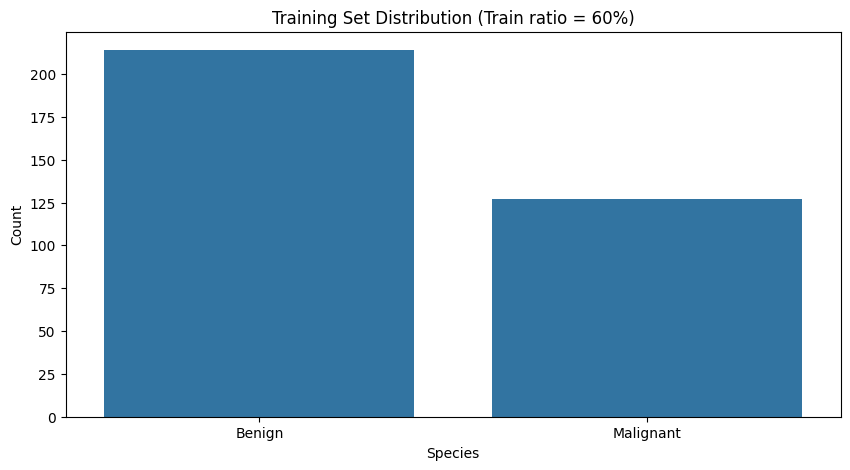

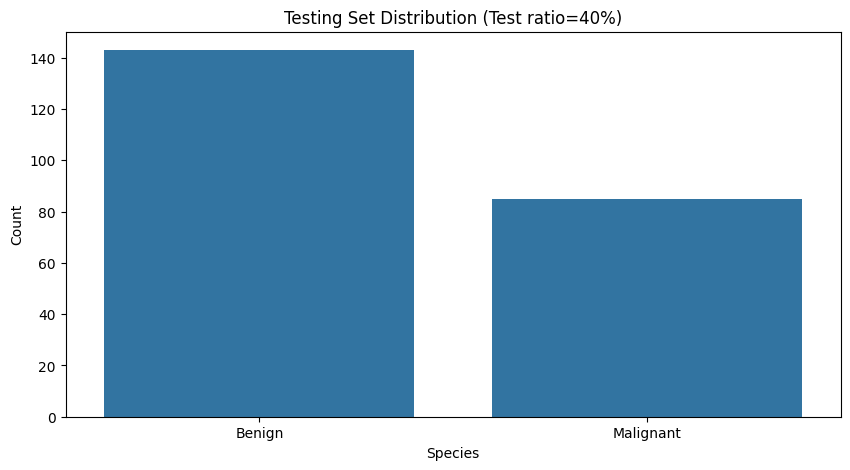

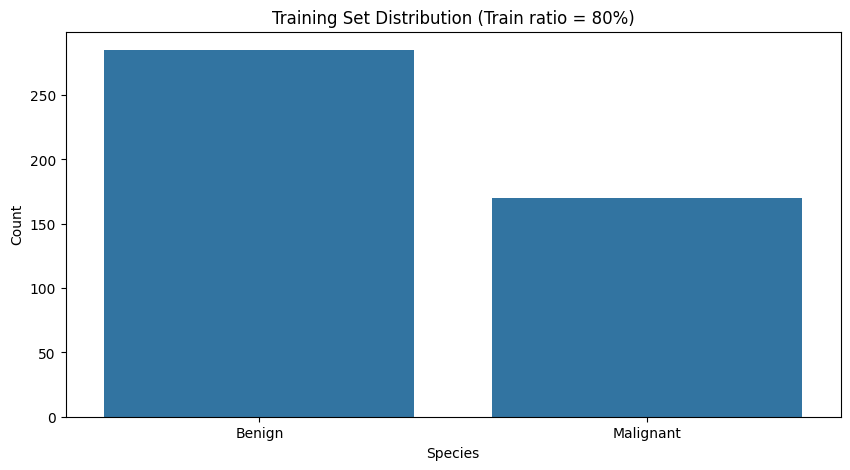

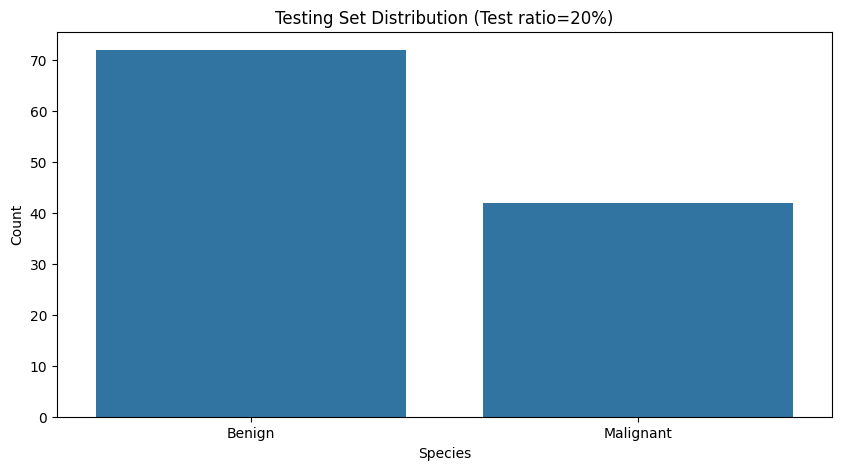

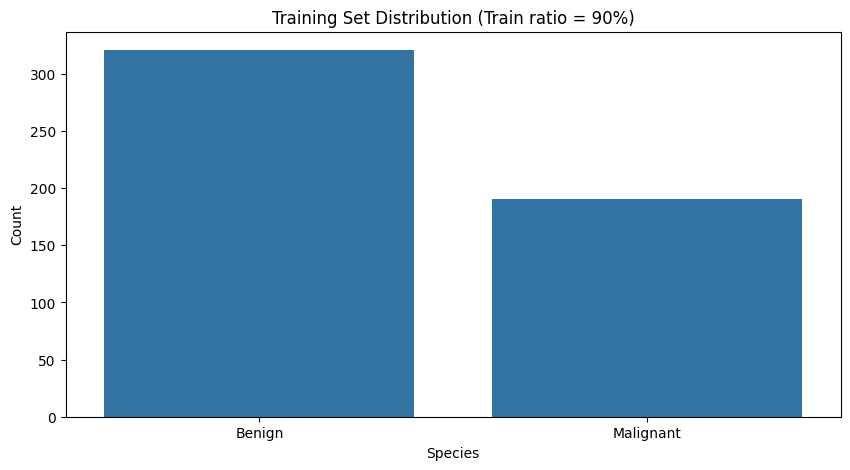

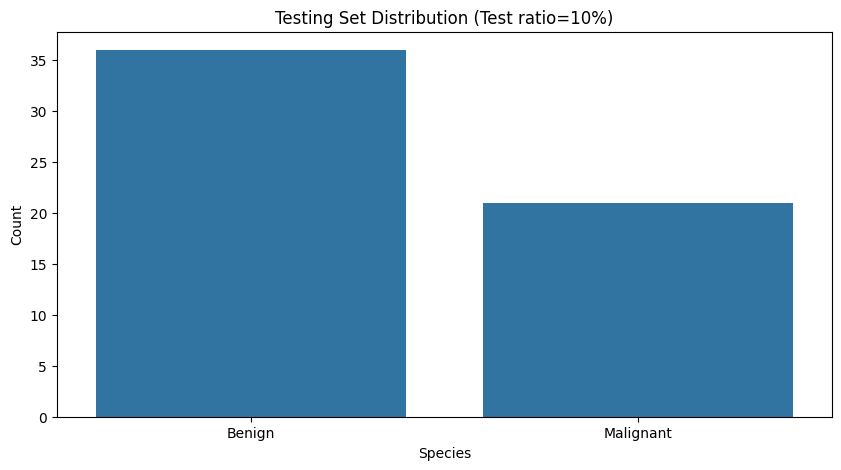

In [19]:
# Train-test split
order = ["Benign", "Malignant"]

# Save split original dataset
split_dir = "BreastCancer/SplitDataset"

os.makedirs(split_dir, exist_ok=True)

original_split_file_name = "original.png"
original_split_file_path = os.path.join(split_dir, original_split_file_name)

plt.figure(figsize=(10, 5))
sns.countplot(x=df['target_label'], order=order)
plt.title("Original dataset distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.savefig(original_split_file_path)
plt.show()

splits = [0.4, 0.6, 0.8, 0.9]
split_results = {}

for train_ratio in splits:
    feature_train, feature_test, label_train, label_test = train_test_split(
        feature, label, train_size=train_ratio, random_state=42, stratify=label, shuffle=True
    )

    split_results[train_ratio] = {
        "feature_train": feature_train,
        "feature_test": feature_test,
        "label_train": label_train,
        "label_test": label_test
    }

    # Convert labels to readable format for visualization
    label_train_named = label_train.map({0: "Malignant", 1: "Benign"})
    label_test_named = label_test.map({0: "Malignant", 1: "Benign"})

    # Save train split dataset
    train_split_file_name = f"train_{int(train_ratio * 100)}.png"
    train_split_file_path = os.path.join(split_dir, train_split_file_name)

    # Visualize trainning and testing set distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_train_named, order=order)
    plt.title(f"Training Set Distribution (Train ratio = {int(train_ratio * 100)}%)")
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.savefig(train_split_file_path)
    plt.show()

    # Save test split dataset
    test_split_file_name = f"test_{100 - int(train_ratio * 100)}.png"
    test_split_file_path = os.path.join(split_dir, test_split_file_name)

    plt.figure(figsize=(10, 5))
    sns.countplot(x=label_test_named, order=order)
    plt.title(f"Testing Set Distribution (Test ratio={100 - int(train_ratio * 100)}%)")
    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.savefig(test_split_file_path)
    plt.show()

Train ratio: 0.4, Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       127
           1       0.95      0.91      0.93       215

    accuracy                           0.91       342
   macro avg       0.90      0.91      0.91       342
weighted avg       0.91      0.91      0.91       342



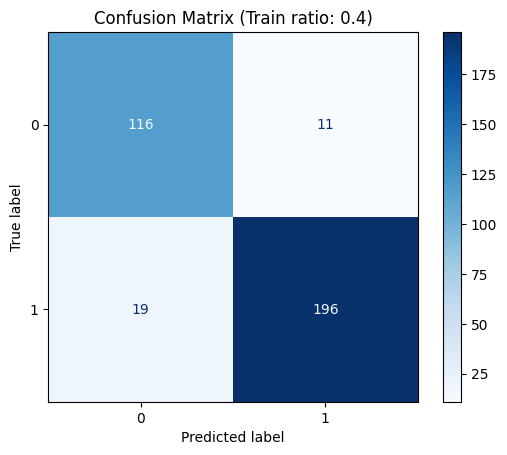

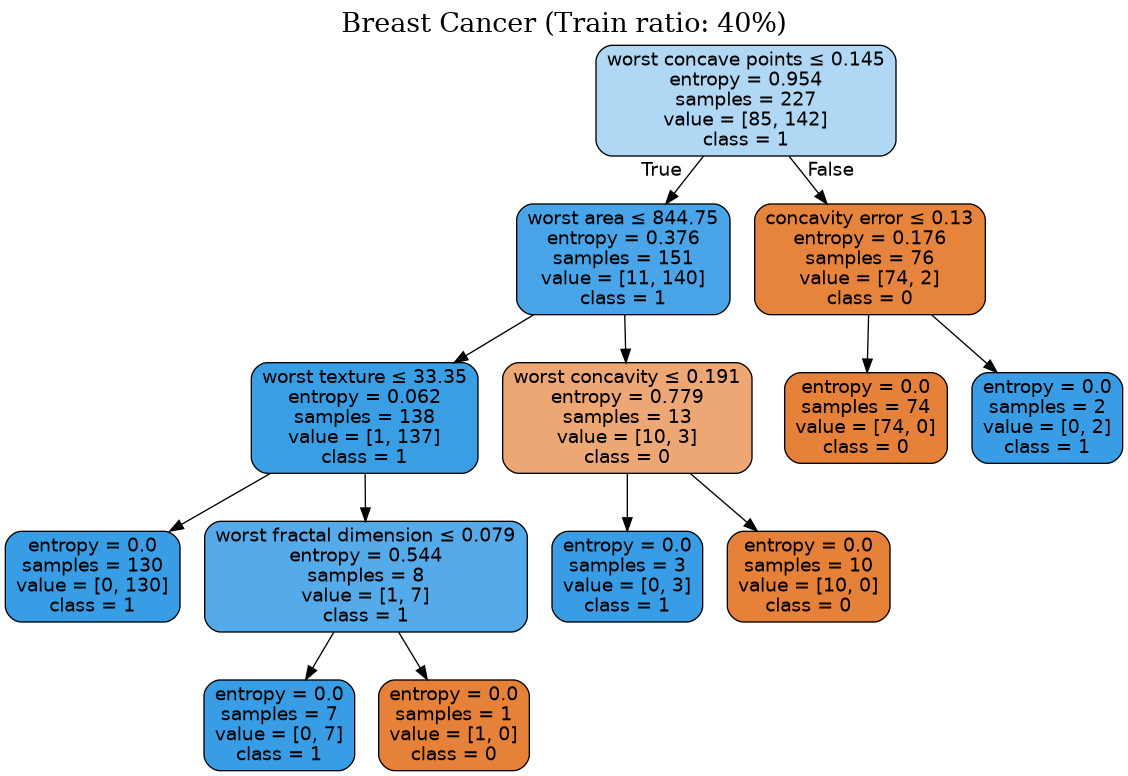

Train ratio: 0.6, Accuracy: 0.9342105263157895
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        85
           1       0.96      0.94      0.95       143

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



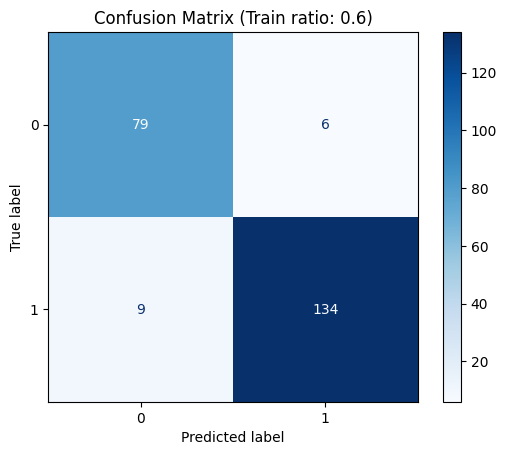

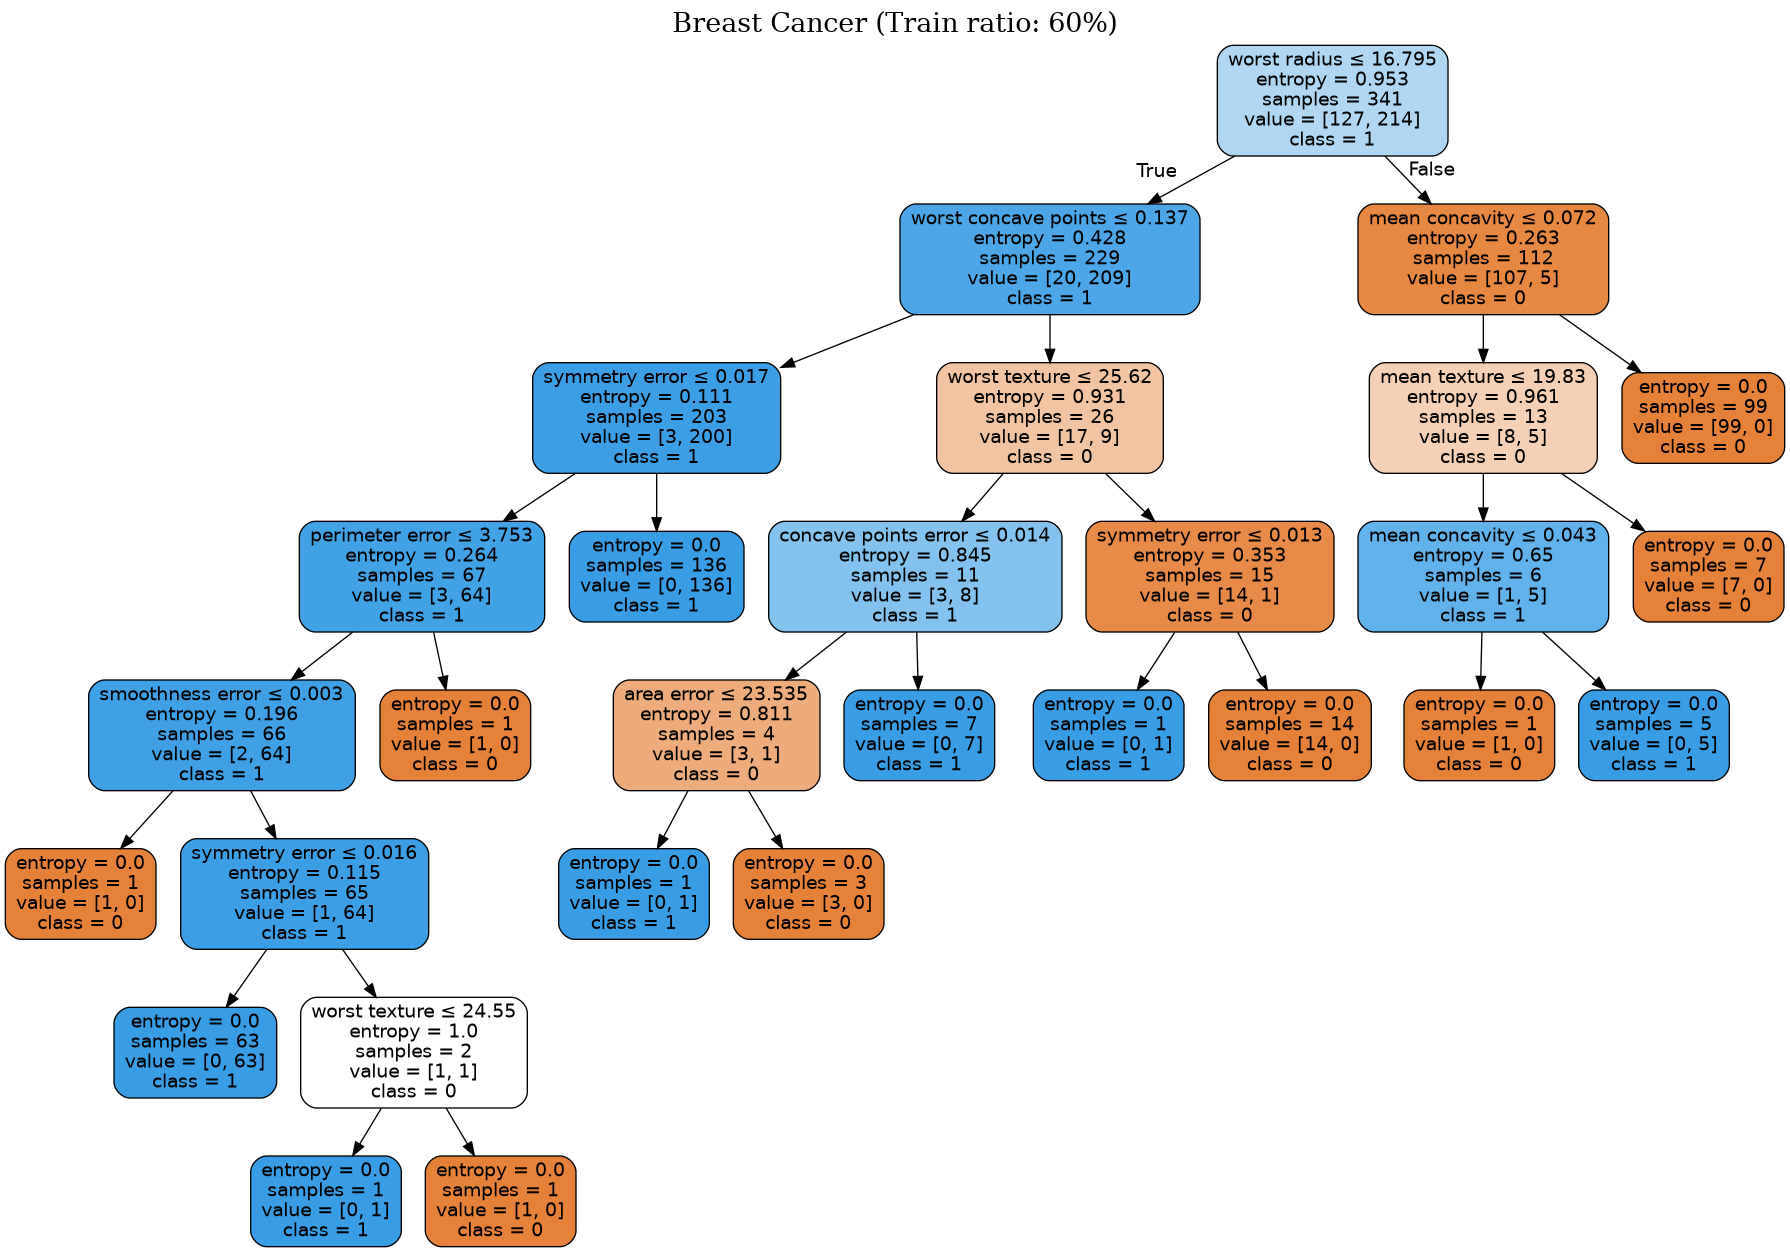

Train ratio: 0.8, Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        42
           1       0.97      0.89      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



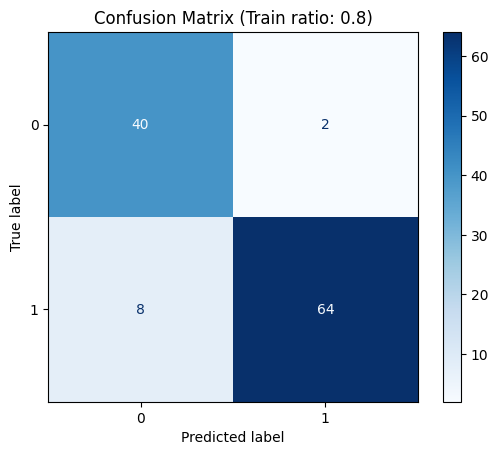

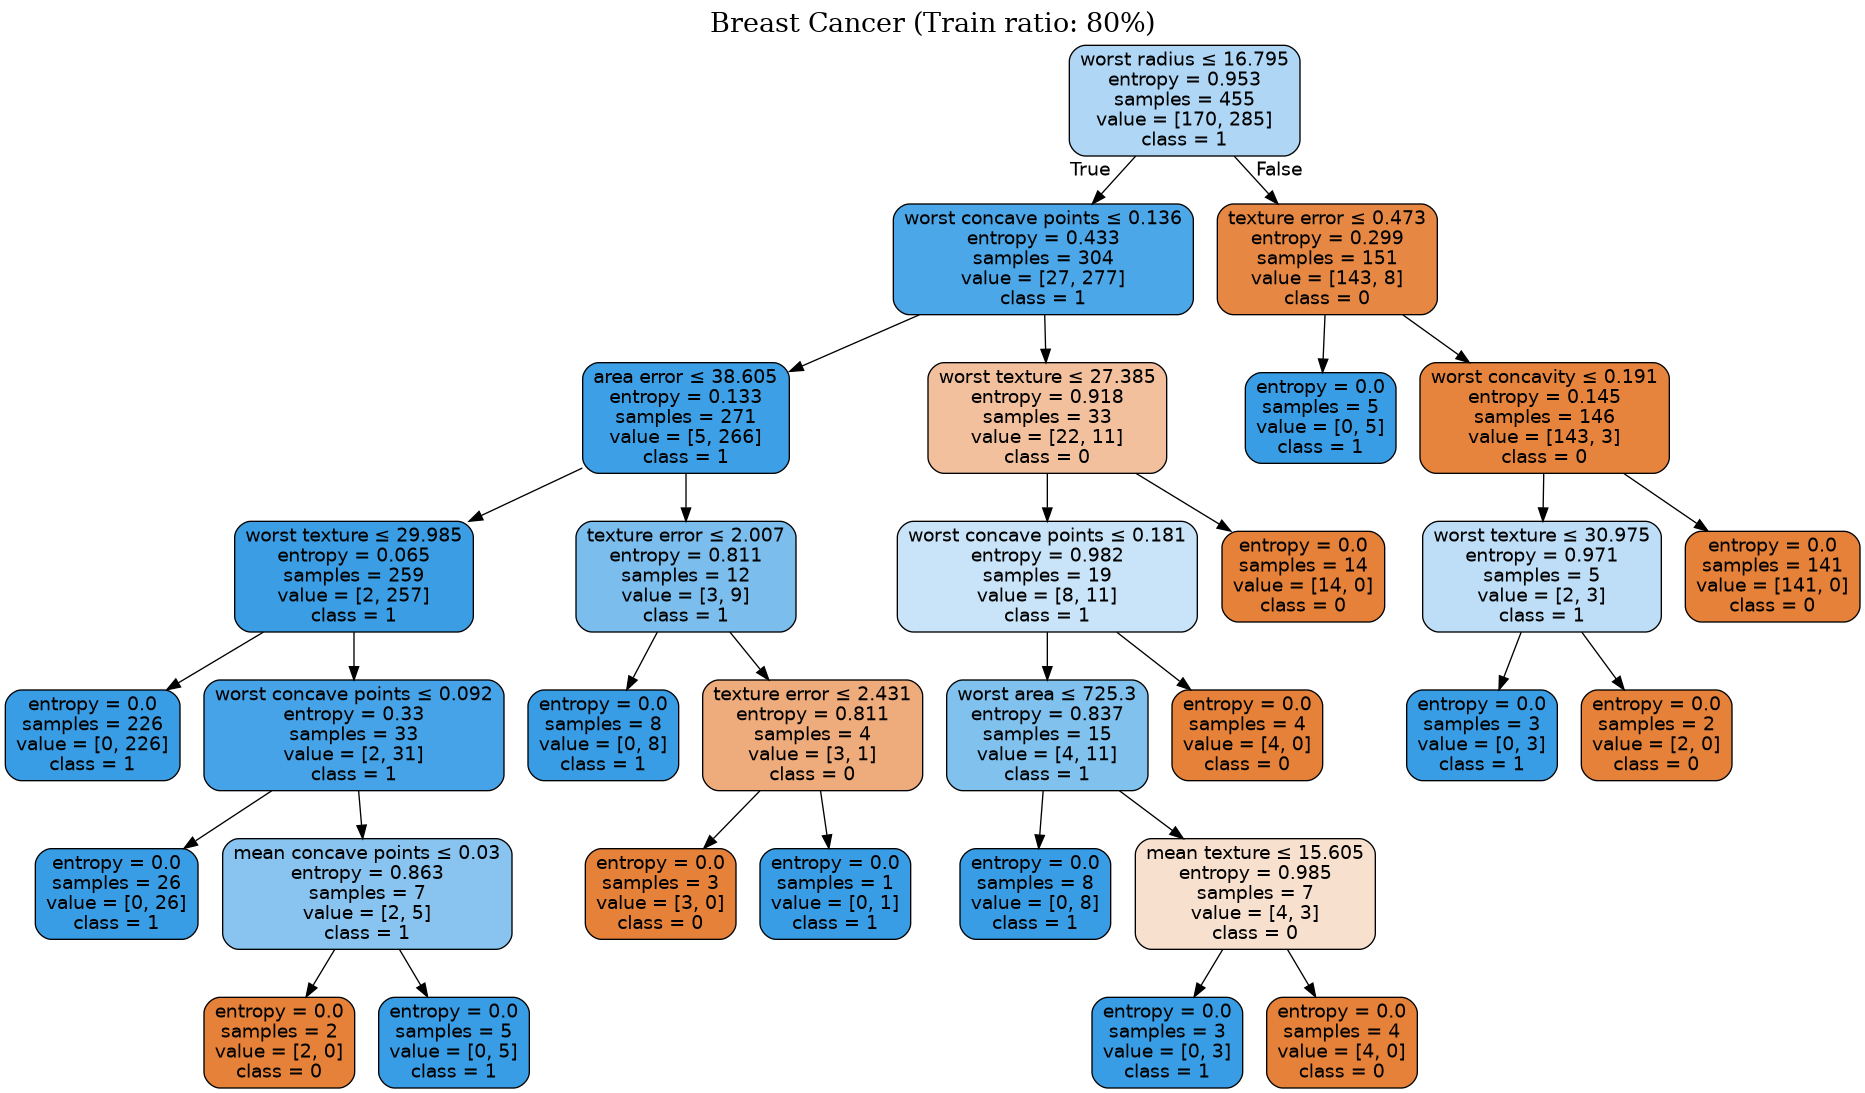

Train ratio: 0.9, Accuracy: 0.8771929824561403
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.97      0.83      0.90        36

    accuracy                           0.88        57
   macro avg       0.87      0.89      0.87        57
weighted avg       0.89      0.88      0.88        57



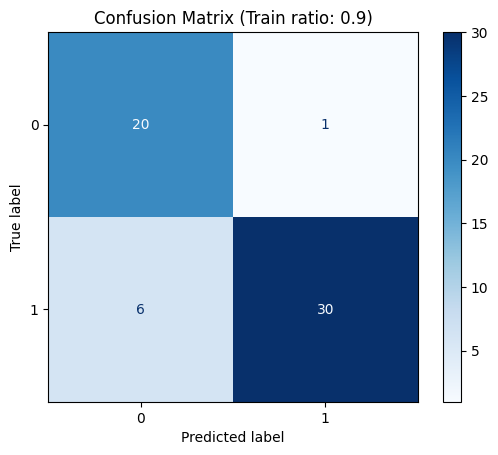

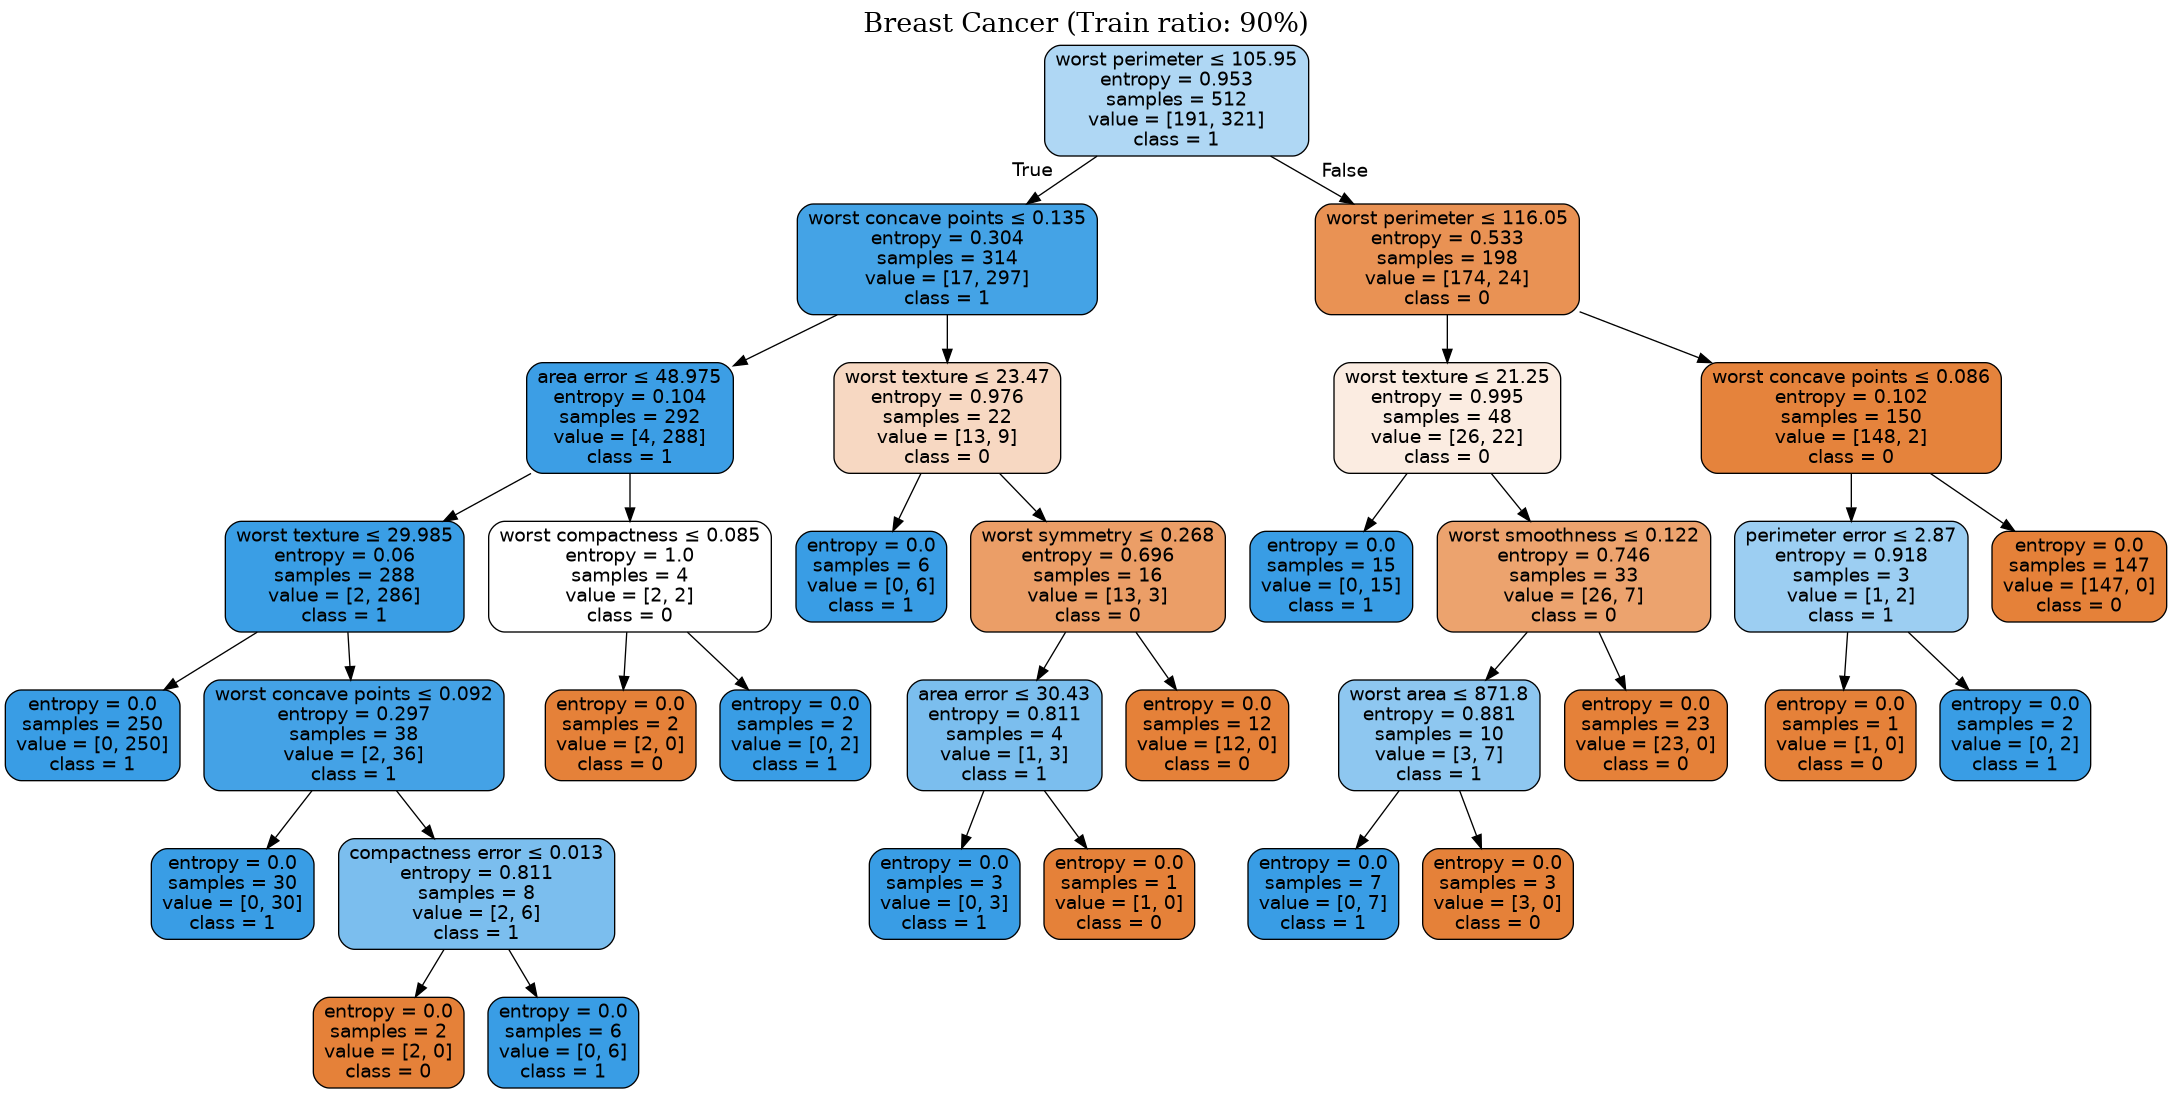

In [20]:
# Train a Decision Tree Classifier
for train_ratio in splits:
    feature_train, feature_test, label_train, label_test = train_test_split(
        feature, label, train_size=train_ratio, random_state=42, stratify=label, shuffle=True
    )

    split_results[train_ratio] = {
        "feature_train": feature_train,
        "feature_test": feature_test,
        "label_train": label_train,
        "label_test": label_test
    }

    # Create and train the model
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(feature_train, label_train)

    # Make predictions
    label_pred = clf.predict(feature_test)

    # Evaluation
    ## Accuracy
    accuracy = accuracy_score(label_test, label_pred)
    print(f"Train ratio: {train_ratio}, Accuracy: {accuracy}")

    ## Classification report
    report = classification_report(label_test, label_pred)
    print(report)

    ## Confusion matrix
    matrix_dir = "BreastCancer/ConfusionMatrix"
    os.makedirs(matrix_dir, exist_ok=True)

    matrix_file_name = f"confusion_matrix_{int(train_ratio * 100)}.png"
    matrix_file_path = os.path.join(matrix_dir, matrix_file_name)

    cm = confusion_matrix(label_test, label_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Train ratio: {train_ratio})")
    plt.savefig(matrix_file_path)
    plt.show()

    # Visualize decision tree
    ## Save decision trees
    dtree_dir = "BreastCancer/DecisionTree"
    os.makedirs(dtree_dir, exist_ok=True)

    dtree_file_name = f"dtree_{int(train_ratio * 100)}"
    dtree_file_path = os.path.join(dtree_dir, dtree_file_name)

    title = f"Breast Cancer (Train ratio: {int(train_ratio * 100)}%)"

    class_names = [str(cls) for cls in clf.classes_]

    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature.columns,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )

    dot_data_with_title = dot_data.replace(
        "digraph Tree {",
        f'digraph Tree {{\ngraph [label="{title}", labelloc=top, fontsize=20];'
    )

    graph = Source(dot_data_with_title)
    graph.render(dtree_file_path, format="png", cleanup=True)
    display(Image(filename=f"{dtree_file_path}.png"))

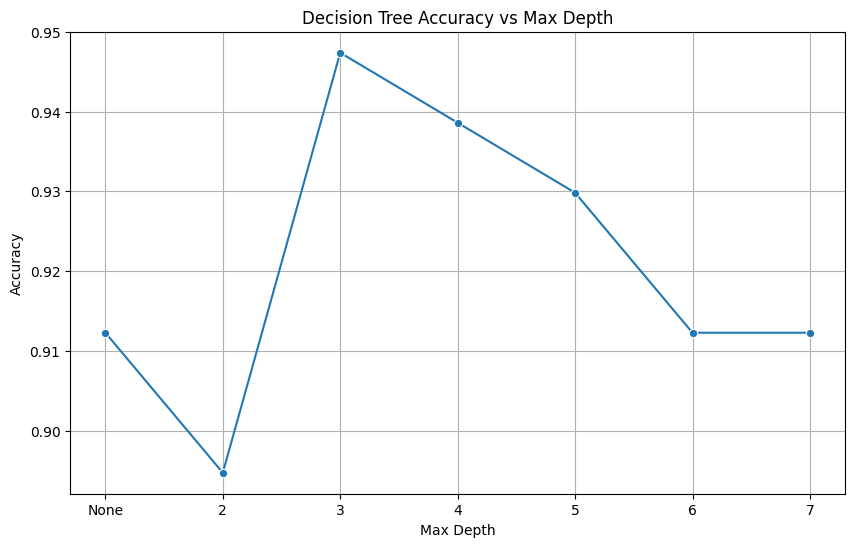

In [21]:
# Analyze accuracy vs max_depth
split_80 = split_results[0.8]
feature_train = split_80["feature_train"]
feature_test = split_80["feature_test"]
label_train = split_80["label_train"]
label_test = split_80["label_test"]

max_depths = [None, 2, 3, 4, 5, 6, 7]
depth_results = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
    model.fit(feature_train, label_train)

    prediction = model.predict(feature_test)
    accuracy = accuracy_score(label_test, prediction)

    depth_results.append({  
        "max_depth": str(max_depth),
        "accuracy": accuracy
    })

# Plot accuracy vs max_depth
max_depth_dir = "BreastCancer/MaxDepth"
os.makedirs(max_depth_dir, exist_ok=True)

max_depth_file_name = "max_depth.png"
max_depth_file_path = os.path.join(max_depth_dir, max_depth_file_name)

depth_df = pd.DataFrame(depth_results)
plt.figure(figsize=(10, 6))
sns.lineplot(data=depth_df, x="max_depth", y="accuracy", marker="o")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig(max_depth_file_path)
plt.show()